<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/Tareas/Igualdad_de_medias_y_varianzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DISEÑO DE EXPERIMENTOS



In [ ]:
# prompt: COMO GENERAR ALEATORIOS DE LA NORMAL

import numpy as np

# Generar números aleatorios de una distribución normal estándar (media=0, desviación estándar=1)
x = np.random.normal(loc=8, scale=4, size=20)  # Genera 10 números
y = np.random.normal(loc=8, scale=4, size=15)  # Genera 10 números

print(x)



# PRIMER PASO ES VER NORMALIDAD

In [2]:
# prompt: Prueba de bondad de ajuste distr normal

import numpy as np
from scipy import stats

# Datos (reemplaza con tus datos reales)
x = np.random.normal(loc=8, scale=4, size=20)  # Genera 20 números
y = np.random.normal(loc=8, scale=4, size=15)  # Genera 15 números

# Combinar los datos si es necesario
datos = np.concatenate((x, y))

# Prueba de Kolmogorov-Smirnov
k, p = stats.kstest(datos, 'norm') #Comparar con distribución normal
print(f"Prueba de Kolmogorov-Smirnov:")
print(f"Estadístico D: {k}")
print(f"Valor p: {p}")
alpha = 0.05
if p > alpha:
  print("No se rechaza la hipótesis de normalidad.")
else:
  print("Se rechaza la hipótesis de normalidad.")

#Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(datos)
print(f"Prueba de Shapiro-Wilk:")
print(f"Estadístico W: {shapiro_test.statistic}")
print(f"Valor p: {shapiro_test.pvalue}")

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("No se rechaza la hipótesis de normalidad")
else:
    print("Se rechaza la hipótesis de normalidad")

#Prueba de Anderson-Darling
anderson_result = stats.anderson(datos, dist='norm')
print(f"Prueba de Anderson-Darling:")
print(f"Estadístico A^2: {anderson_result.statistic}")
print(f"Valores críticos: {anderson_result.critical_values}")
print(f"Niveles de significancia: {anderson_result.significance_level}")

if anderson_result.statistic < anderson_result.critical_values[2]:
    print("No se rechaza la hipótesis de normalidad al 5% de significancia")
else:
    print("Se rechaza la hipótesis de normalidad al 5% de significancia")

Prueba de Kolmogorov-Smirnov:
Estadístico D: 0.9134669421258205
Valor p: 1.2664726123742562e-37
Se rechaza la hipótesis de normalidad.
Prueba de Shapiro-Wilk:
Estadístico W: 0.9405366729314193
Valor p: 0.05810426205451237
No se rechaza la hipótesis de normalidad
Prueba de Anderson-Darling:
Estadístico A^2: 0.7213752115744541
Valores críticos: [0.527 0.6   0.719 0.839 0.998]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Se rechaza la hipótesis de normalidad al 5% de significancia


In [5]:
stats.shapiro(x)

ShapiroResult(statistic=0.9072593628249221, pvalue=0.0565278467958714)

$$
H_0 : X \sim N(\mu,σ)\\
H_a : X \neq N(\mu,σ)
$$

In [6]:
stats.shapiro(y) # No se rechaza Ho

ShapiroResult(statistic=0.9617165620413555, pvalue=0.7222045463462314)

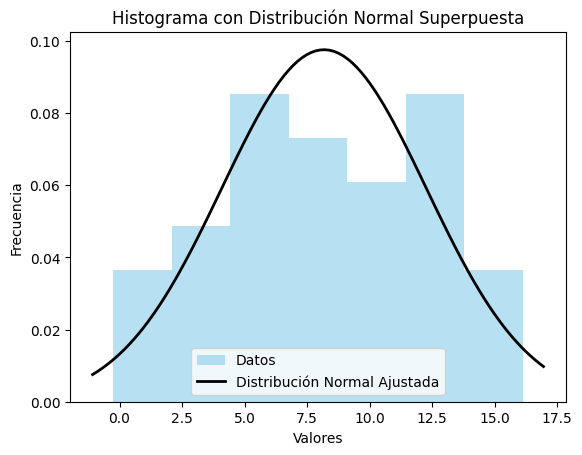

In [7]:
# prompt: Hacer histograma con distribución normal sobrepuesta

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datos (reemplaza con tus datos reales)
x = np.random.normal(loc=8, scale=4, size=20)  # Genera 20 números
y = np.random.normal(loc=8, scale=4, size=15)  # Genera 15 números

# Combinar los datos si es necesario
datos = np.concatenate((x, y))

# Crear el histograma
plt.hist(datos, bins='auto', density=True, alpha=0.6, color='skyblue', label='Datos')

# Ajustar una distribución normal a los datos
mu, std = stats.norm.fit(datos)

# Generar la curva de la distribución normal
xmin, xmax = plt.xlim()
x_normal = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x_normal, mu, std)
plt.plot(x_normal, p, 'k', linewidth=2, label='Distribución Normal Ajustada')

# Agregar título y etiquetas
plt.title('Histograma con Distribución Normal Superpuesta')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

# SUPUESTO DE HOMOCEDASTICIDAD
$$
H_0: \frac{\sigma_1}{\sigma_2}=1\\
H_a: \frac{\sigma_1}{\sigma_2}\neq1
$$

Homocedasticidad bajo la hipótesis nula, Heterocedasticidad bajo la hipótesis alterna.

In [10]:
# prompt: homocedasticidad de x y y

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos (reemplaza con tus datos reales)
x = np.random.normal(loc=8, scale=4, size=20)  # Genera 20 números
y = np.random.normal(loc=8, scale=4, size=15)  # Genera 15 números

# Prueba de Levene para la homocedasticidad
levene_test = stats.levene(x, y)
print(f"Prueba de Levene:")
print(f"Estadístico W: {levene_test.statistic}")
print(f"Valor p: {levene_test.pvalue}")

alpha = 0.05
if levene_test.pvalue > alpha:
    print("No se rechaza la hipótesis de homocedasticidad")
else:
    print("Se rechaza la hipótesis de homocedasticidad")


# Prueba de Bartlett para la homocedasticidad (más sensible a las desviaciones de la normalidad)
bartlett_test = stats.bartlett(x, y)
print(f"\nPrueba de Bartlett:")
print(f"Estadístico T^2: {bartlett_test.statistic}")
print(f"Valor p: {bartlett_test.pvalue}")

if bartlett_test.pvalue > alpha:
    print("No se rechaza la hipótesis de homocedasticidad")
else:
    print("Se rechaza la hipótesis de homocedasticidad")



Prueba de Levene:
Estadístico W: 0.1118454139346018
Valor p: 0.7401691542170141
No se rechaza la hipótesis de homocedasticidad

Prueba de Bartlett:
Estadístico T^2: 0.058492069928639465
Valor p: 0.8088953571092783
No se rechaza la hipótesis de homocedasticidad


In [11]:
# prompt: t-student para dif medias co n v ar iguales

import numpy as np
from scipy import stats

# Datos (reemplaza con tus datos reales)
x = np.random.normal(loc=8, scale=4, size=20)  # Genera 20 números
y = np.random.normal(loc=8, scale=4, size=15)  # Genera 15 números

# Prueba t de Student para muestras independientes con varianzas iguales
t_statistic, p_value = stats.ttest_ind(x, y, equal_var=True)

print(f"Prueba t de Student:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula (las medias de las poblaciones son iguales)")
else:
    print("Se rechaza la hipótesis nula (las medias de las poblaciones son diferentes)")

Prueba t de Student:
Estadístico t: -0.27058856484497457
Valor p: 0.7883927407849757
No se rechaza la hipótesis nula (las medias de las poblaciones son iguales)


# DIFERENCIA DE MEDIAS BAJO VARIANZAS DIFERENTES

In [12]:
# prompt: t-student para dif medias co n v ar iguales

import numpy as np
from scipy import stats

# Datos (reemplaza con tus datos reales)
x = np.random.normal(loc=8, scale=4, size=20)  # Genera 20 números
y = np.random.normal(loc=8, scale=9, size=15)  # Genera 15 números


# Prueba de Bartlett para la homocedasticidad (más sensible a las desviaciones de la normalidad)
bartlett_test = stats.bartlett(x, y)
print(f"\nPrueba de Bartlett:")
print(f"Estadístico T^2: {bartlett_test.statistic}")
print(f"Valor p: {bartlett_test.pvalue}")

if bartlett_test.pvalue > alpha:
    print("No se rechaza la hipótesis de homocedasticidad")
else:
    print("Se rechaza la hipótesis de homocedasticidad")

# Prueba t de Student para muestras independientes con varianzas iguales
t_statistic, p_value = stats.ttest_ind(x, y, equal_var=False)

print(f"Prueba t de Student:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula (las medias de las poblaciones son iguales)")
else:
    print("Se rechaza la hipótesis nula (las medias de las poblaciones son diferentes)")


Prueba de Bartlett:
Estadístico T^2: 5.907361064593669
Valor p: 0.015077742296727165
Se rechaza la hipótesis de homocedasticidad
Prueba t de Student:
Estadístico t: 0.6171305845412942
Valor p: 0.5440755288854084
No se rechaza la hipótesis nula (las medias de las poblaciones son iguales)


In [13]:
# prompt: t-student para dif medias co n v ar iguales

import numpy as np
from scipy import stats

# Datos (reemplaza con tus datos reales)
x = np.random.normal(loc=8, scale=4, size=20)  # Genera 20 números
y = np.random.normal(loc=90, scale=9, size=15)  # Genera 15 números


# Prueba de Bartlett para la homocedasticidad (más sensible a las desviaciones de la normalidad)
bartlett_test = stats.bartlett(x, y)
print(f"\nPrueba de Bartlett:")
print(f"Estadístico T^2: {bartlett_test.statistic}")
print(f"Valor p: {bartlett_test.pvalue}")

if bartlett_test.pvalue > alpha:
    print("No se rechaza la hipótesis de homocedasticidad")
else:
    print("Se rechaza la hipótesis de homocedasticidad")

# Prueba t de Student para muestras independientes con varianzas iguales
t_statistic, p_value = stats.ttest_ind(x, y, equal_var=False)

print(f"Prueba t de Student:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula (las medias de las poblaciones son iguales)")
else:
    print("Se rechaza la hipótesis nula (las medias de las poblaciones son diferentes)")


Prueba de Bartlett:
Estadístico T^2: 3.0406329057840176
Valor p: 0.08120425107122851
No se rechaza la hipótesis de homocedasticidad
Prueba t de Student:
Estadístico t: -42.80526771376501
Valor p: 4.725977794994371e-23
Se rechaza la hipótesis nula (las medias de las poblaciones son diferentes)


In [22]:
x=[1.4,2.5,3.1]
np.mean(x)
z=x-np.mean(x)
z=(x-np.mean(x))*(x-np.mean(x))
sum(z)/2
np.var(x)

0.4955555555555556